# Tutorial

In [2]:
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# these lines of code are to be used if using the binder instance. Ignore otherwise!
import sys
sys.path.append('../../../')
from magine.copy_sample_dbs import copy_sample_databases
# This uses the a cached version of the databases to speed up the tutorial
copy_sample_databases()

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np

## ExperimentalData 

Since MAGINE is built for multi-sample, multi-omics data, it is no surprise that the data is the most important aspect. Here we should how to use the :py:class:`ExperimentalData` class. 

In [5]:
# load the experimental data
from magine.data.experimental_data import load_data_csv

exp_data = load_data_csv('Data/norris_et_al_2017_cisplatin_data.csv.gz', low_memory=False)

C:\Users\James\miniconda3\envs\magine_37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning:

load_data_csv will be removed in a future version of MAGINE. Use load_data instead.



In [6]:
help(exp_data)

Help on ExperimentalData in module magine.data.experimental_data object:

class ExperimentalData(builtins.object)
 |  ExperimentalData(data_file)
 |  
 |  Manages all experimental data
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, name)
 |  
 |  __init__(self, data_file)
 |      Parameters
 |      ----------
 |      data_file : str, pandas.DataFrame
 |          Name of file, generally csv.
 |          If provided a str, the file will be read in as a pandas.DataFrame
 |  
 |  __setattr__(self, name, value)
 |      Implement setattr(self, name, value).
 |  
 |  create_summary_table(self, sig=False, index='identifier', save_name=None, plot=False, write_latex=False)
 |      Creates a summary table of data.
 |      
 |      
 |      Parameters
 |      ----------
 |      sig: bool
 |          Flag to summarize significant species only
 |      save_name: str
 |          Name to save csv and .tex file
 |      index: str
 |         Index for counts
 |      plot: bool
 |          If 

### Getting counts from data

In [7]:
display(exp_data.create_summary_table())
display(exp_data.create_summary_table(sig=True))
display(exp_data.create_summary_table(sig=True, index='label'))

sample_id    01hr   06hr   24hr  48hr  Total Unique Across
source                                                    
C18           522    227    653   685                 1402
HILIC         471    605    930   613                 1504
label_free   2766   2742   2551  2261                 3447
ph_silac     2608   3298   3384  3236                 5113
rna_seq     18741  19104  19992     -                20642
silac        2923   3357   3072  3265                 4086

sample_id   01hr  06hr   24hr 48hr  Total Unique Across
source                                                 
C18          522   227    653  685                 1402
HILIC        471   605    930  613                 1504
label_free   196    46    271  874                 1085
ph_silac     514   888   1227  851                 2278
rna_seq       73  1999  12215    -                12340
silac         38    52    228  266                  485

sample_id   01hr  06hr   24hr  48hr  Total Unique Across
source                                                  
C18          528   227    657   689                 1412
HILIC        479   611    941   621                 1521
label_free   201    46    281   911                 1149
ph_silac     594  1370   2414  1368                 4757
rna_seq       73  1999  12215     -                12340
silac         38    52    228   266                  485

In [8]:
exp_data.species.head(5)

identifier              label species_type  fold_change  p_value  \
0       HOXD1       HOXD1_rnaseq      protein  -520.256762  0.00102   
1     MIR7704     MIR7704_rnaseq      protein  -520.256762  0.00102   
2  AC078814.1  AC078814.1_rnaseq      protein   -76.022260  0.00102   
3       PPM1H       PPM1H_rnaseq      protein   -76.022260  0.00102   
4       PLCH1       PLCH1_rnaseq      protein   -17.888990  0.00102   

   significant sample_id   source  
0         True      06hr  rna_seq  
1         True      06hr  rna_seq  
2         True      06hr  rna_seq  
3         True      06hr  rna_seq  
4         True      06hr  rna_seq

### Filter  by category (experimental method)

The `.species` index aggregates all data. 

MAGINE uses the `species_type` and `source` column name to split data into `compounds`, `genes` (includes `species_type`==`gene`), `rna` (includes `species_type`==`gene`, `source` == `rna`), or `protein` (`species_type`==`gene`, `source` != `rna`). 
They can be accessed with the ".prefix", such as


In [9]:
exp_data.genes.head(5)

identifier              label species_type  fold_change  p_value  \
0       HOXD1       HOXD1_rnaseq      protein  -520.256762  0.00102   
1     MIR7704     MIR7704_rnaseq      protein  -520.256762  0.00102   
2  AC078814.1  AC078814.1_rnaseq      protein   -76.022260  0.00102   
3       PPM1H       PPM1H_rnaseq      protein   -76.022260  0.00102   
4       PLCH1       PLCH1_rnaseq      protein   -17.888990  0.00102   

   significant sample_id   source  
0         True      06hr  rna_seq  
1         True      06hr  rna_seq  
2         True      06hr  rna_seq  
3         True      06hr  rna_seq  
4         True      06hr  rna_seq

In [10]:
exp_data.compounds.head(5)

identifier                                              label  \
128152  HMDB0036114                                      (-)-3-Thujone   
128153  HMDB0001320    (13E)-11a-Hydroxy-9,15-dioxoprost-13-enoic acid   
128154  HMDB0012113               (22Alpha)-hydroxy-campest-4-en-3-one   
128155  HMDB0010361  (23S)-23,25-dihdroxy-24-oxovitamine D3 23-(bet...   
128156  HMDB0011644        (24R)-Cholest-5-ene-3-beta,7-alpha,24-triol   

       species_type  fold_change       p_value  significant sample_id source  
128152  metabolites          1.6  2.100000e-02         True      06hr    C18  
128153  metabolites         88.8  5.800000e-12         True      24hr    C18  
128154  metabolites        100.0  9.500000e-04         True      48hr  HILIC  
128155  metabolites       -100.0  1.000000e-12         True      48hr    C18  
128156  metabolites          1.6  7.400000e-05         True      01hr    C18

Similarily, we can also filter the data by `source` using the `.name`, where name is anything in the `source` column. We can get a list of these by printing `exp_data.exp_methods`. 


In [11]:
# prints all the available exp_methods
exp_data.exp_methods

['rna_seq', 'ph_silac', 'label_free', 'silac', 'C18', 'HILIC']

In [12]:
# filters to only the 'label_free' 
exp_data.label_free.shape

(13085, 8)

In [13]:
exp_data.label_free.head(5)

identifier       label species_type  fold_change  p_value  significant  \
102446      LIMS1    LIMS1_lf      protein        12.42  0.00003         True   
102447    SMARCE1  SMARCE1_lf      protein        -2.49  0.00030         True   
102448       HEXA     HEXA_lf      protein         6.42  0.00060         True   
102449      SRSF1    SRSF1_lf      protein        -3.21  0.00060         True   
102450      SF3B1    SF3B1_lf      protein        -1.57  0.00130         True   

       sample_id      source  
102446      01hr  label_free  
102447      01hr  label_free  
102448      01hr  label_free  
102449      01hr  label_free  
102450      01hr  label_free

In [14]:
exp_data.HILIC.head(5)

identifier                                        label species_type  \
128154  HMDB0012113         (22Alpha)-hydroxy-campest-4-en-3-one  metabolites   
128157  HMDB0011644  (24R)-Cholest-5-ene-3-beta,7-alpha,24-triol  metabolites   
128162  HMDB0012114                    (3S)-3,6-Diaminohexanoate  metabolites   
128164  HMDB0012114                    (3S)-3,6-Diaminohexanoate  metabolites   
128166  HMDB0012115                 (3S,5S)-3,5-Diaminohexanoate  metabolites   

        fold_change   p_value  significant sample_id source  
128154        100.0  0.000950         True      48hr  HILIC  
128157          1.7  0.000072         True      24hr  HILIC  
128162         -1.9  0.000030         True      06hr  HILIC  
128164         -3.0  0.002000         True      24hr  HILIC  
128166         -1.9  0.000030         True      06hr  HILIC

### Significant filter 
The `significant` column is mapped to the `.sig` property.

In [15]:
exp_data.rna_seq.sig.head(5)

identifier              label species_type  fold_change  p_value  \
0       HOXD1       HOXD1_rnaseq      protein  -520.256762  0.00102   
1     MIR7704     MIR7704_rnaseq      protein  -520.256762  0.00102   
2  AC078814.1  AC078814.1_rnaseq      protein   -76.022260  0.00102   
3       PPM1H       PPM1H_rnaseq      protein   -76.022260  0.00102   
4       PLCH1       PLCH1_rnaseq      protein   -17.888990  0.00102   

   significant sample_id   source  
0         True      06hr  rna_seq  
1         True      06hr  rna_seq  
2         True      06hr  rna_seq  
3         True      06hr  rna_seq  
4         True      06hr  rna_seq

### Filter data to up or down regulated species.

For enrichment analysis, we will want to access up-regulated and down-regulated species.

In [16]:
exp_data.rna_seq.up.head(10)

identifier                 label species_type  fold_change   p_value  \
13           DLX2           DLX2_rnaseq      protein     2.874358  0.001020   
18         RETSAT         RETSAT_rnaseq      protein     2.325934  0.001020   
21        SLC52A1        SLC52A1_rnaseq      protein     2.871869  0.001020   
24          OTUD3          OTUD3_rnaseq      protein     1.821775  0.001020   
35  RP11-209D14.2  RP11-209D14.2_rnaseq      protein     1.819533  0.025204   
58         ZNF554         ZNF554_rnaseq      protein     2.309691  0.004153   
59           FZD9           FZD9_rnaseq      protein     1.812798  0.001020   
71           SBK1           SBK1_rnaseq      protein     1.806427  0.002689   
88          PPM1D          PPM1D_rnaseq      protein     1.803186  0.001020   
92         ZNF425         ZNF425_rnaseq      protein     2.846581  0.001020   

    significant sample_id   source  
13         True      06hr  rna_seq  
18         True      06hr  rna_seq  
21         True      06hr  rna_seq  
24         True      06hr  rna_seq  
35         True      06hr  rna_seq  
58         True      06hr  rna_seq  
59         True      06hr  rna_seq  
71         True      06hr  rna_seq  
88         True      06hr  rna_seq  
92         True      06hr  rna_seq

In [17]:
exp_data.rna_seq.down.head(10)

identifier                label species_type  fold_change   p_value  \
0         HOXD1         HOXD1_rnaseq      protein  -520.256762  0.001020   
1       MIR7704       MIR7704_rnaseq      protein  -520.256762  0.001020   
2    AC078814.1    AC078814.1_rnaseq      protein   -76.022260  0.001020   
3         PPM1H         PPM1H_rnaseq      protein   -76.022260  0.001020   
4         PLCH1         PLCH1_rnaseq      protein   -17.888990  0.001020   
5  RP11-639F1.1  RP11-639F1.1_rnaseq      protein   -17.888990  0.001020   
6          TP63          TP63_rnaseq      protein   -12.355659  0.001020   
7        JARID2        JARID2_rnaseq      protein    -7.891502  0.001020   
8          GLI2          GLI2_rnaseq      protein    -5.389009  0.001020   
9        MAP3K5        MAP3K5_rnaseq      protein    -4.262353  0.001893   

   significant sample_id   source  
0         True      06hr  rna_seq  
1         True      06hr  rna_seq  
2         True      06hr  rna_seq  
3         True      06hr  rna_seq  
4         True      06hr  rna_seq  
5         True      06hr  rna_seq  
6         True      06hr  rna_seq  
7         True      06hr  rna_seq  
8         True      06hr  rna_seq  
9         True      06hr  rna_seq

### Extracting by sample (time point)

In [18]:
for i in exp_data.sample_ids:
    print(i)
    display(exp_data[i].head(5))

01hr


identifier                label species_type  fold_change   p_value  \
19160         GRIK4         GRIK4_rnaseq      protein    77.555651  0.019824   
19161  GRIK4_3p_UTR  GRIK4_3p_UTR_rnaseq      protein    77.555651  0.019824   
19162    AP001187.9    AP001187.9_rnaseq      protein   -25.455050  0.019824   
19163        MIR192        MIR192_rnaseq      protein   -25.455050  0.019824   
19164      MIR194-2      MIR194-2_rnaseq      protein   -25.455050  0.019824   

       significant sample_id   source  
19160         True      01hr  rna_seq  
19161         True      01hr  rna_seq  
19162         True      01hr  rna_seq  
19163         True      01hr  rna_seq  
19164         True      01hr  rna_seq

06hr


identifier              label species_type  fold_change  p_value  \
0       HOXD1       HOXD1_rnaseq      protein  -520.256762  0.00102   
1     MIR7704     MIR7704_rnaseq      protein  -520.256762  0.00102   
2  AC078814.1  AC078814.1_rnaseq      protein   -76.022260  0.00102   
3       PPM1H       PPM1H_rnaseq      protein   -76.022260  0.00102   
4       PLCH1       PLCH1_rnaseq      protein   -17.888990  0.00102   

   significant sample_id   source  
0         True      06hr  rna_seq  
1         True      06hr  rna_seq  
2         True      06hr  rna_seq  
3         True      06hr  rna_seq  
4         True      06hr  rna_seq

24hr


identifier            label species_type  fold_change   p_value  \
37960       LHX3      LHX3_rnaseq      protein   202.225343  0.005180   
37961   C17orf67  C17orf67_rnaseq      protein     2.571464  0.000123   
37962       ALX1      ALX1_rnaseq      protein    -2.572587  0.000123   
37963    MIR7844   MIR7844_rnaseq      protein     2.573033  0.009349   
37964      TMCC3     TMCC3_rnaseq      protein     2.573033  0.009349   

       significant sample_id   source  
37960         True      24hr  rna_seq  
37961         True      24hr  rna_seq  
37962         True      24hr  rna_seq  
37963         True      24hr  rna_seq  
37964         True      24hr  rna_seq

48hr


identifier                     label species_type  fold_change  p_value  \
58025       TNS3    TNS3_1188_1197_phsilac      protein    -3.837129    0.049   
58026    SIPA1L3  SIPA1L3_S(ph)158_phsilac      protein    -5.119600    0.049   
58027       TNS3     TNS3_Y(ph)780_phsilac      protein    -4.986421    0.049   
58028       FGD6     FGD6_S(ph)554_phsilac      protein    -3.900705    0.049   
58029       GPN1     GPN1_S(ph)312_phsilac      protein     2.901199    0.049   

       significant sample_id    source  
58025         True      48hr  ph_silac  
58026         True      48hr  ph_silac  
58027         True      48hr  ph_silac  
58028         True      48hr  ph_silac  
58029         True      48hr  ph_silac

### Pivot table to get table across time

In [19]:
exp_data.label_free.pivoter(
    convert_to_log=False, 
    index='identifier',
    columns='sample_id',
    values=['fold_change', 'p_value']
).head(10)

fold_change                        p_value                    \
sample_id         01hr   06hr   24hr   48hr      01hr     06hr     24hr   
identifier                                                                
A2M           1.040000  1.140  51.93  11.58  0.514800  0.44370  0.24260   
AACS         -1.100000  3.740    NaN    NaN  0.281800  0.26950      NaN   
AAGAB         1.000000 -1.150   1.46  -2.03  0.968100  0.39240  0.84450   
AAK1          1.320000  1.590    NaN   1.72  0.715800  0.18110      NaN   
AAMP         -1.200000 -1.460   1.85   1.78  0.836800  0.55420  0.13640   
AAR2               NaN -1.690    NaN    NaN       NaN  0.96510      NaN   
AARS          0.326667 -0.035  -1.44  -3.12  0.299867  0.62425  0.46725   
AARS2         1.170000    NaN    NaN    NaN  0.253000      NaN      NaN   
AARSD1        1.210000  4.070  -2.05    NaN  0.459700  0.49160  0.78440   
AASDHPPT     -0.330000  1.020   1.07  -1.11  0.709600  0.81160  0.45290   

                     
sample_id      48hr  
identifier           
A2M         0.11130  
AACS            NaN  
AAGAB       0.09760  
AAK1        0.95660  
AAMP        0.32460  
AAR2            NaN  
AARS        0.00045  
AARS2           NaN  
AARSD1          NaN  
AASDHPPT    0.00070

Note that in the previous two examples, we find that there are NaN values. This is because of our experiental data. We can easy check what species are not found in all 4 of our label free experiements.

In [20]:
print(len(exp_data.label_free.present_in_all_columns(
    index='identifier',
    columns='sample_id',
).id_list))

Number in index went from 3447 to 1819
1819


This shows that out of the 3447 unique species measured in label-free proteomics, only 1819 were measured in all time points. What one can do with this information is dependent on the analysis. For now, we will keep using the full dataset.

### Visualization 

#### Volcano plots

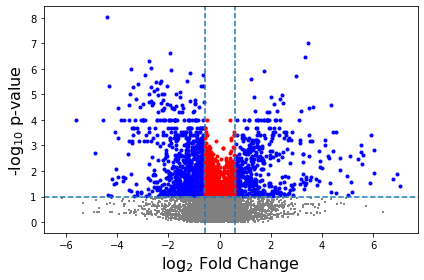

In [21]:
exp_data.label_free.volcano_plot();

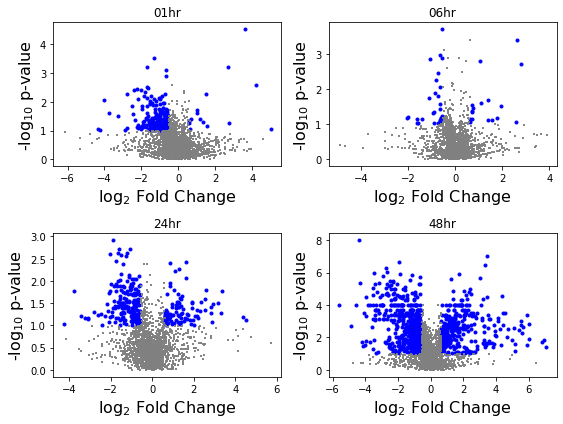

In [22]:
exp_data.label_free.volcano_by_sample(sig_column=True);

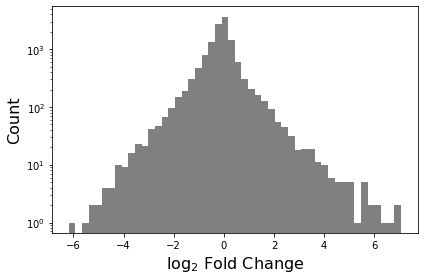

In [23]:
exp_data.label_free.plot_histogram();

### Plotting subset of species

We provide the a few plotting interfaces to explore that subsets of the data. Basically, you create a list of species and provide it to the function. It filters based on these and then returns the results. 


#### Time series using ploty and matplotlib

In [24]:
exp_data.label_free.plot_species(['LMNA', 'VDAC1'], plot_type='plotly')

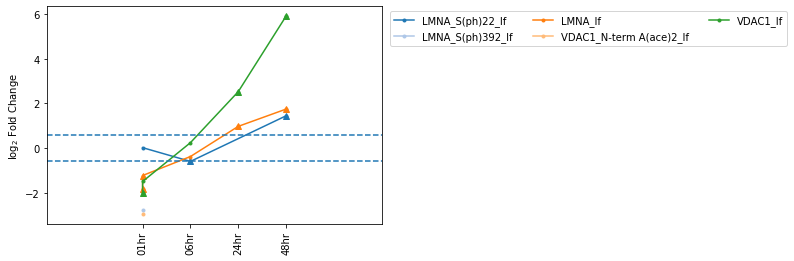

In [25]:
exp_data.label_free.plot_species(['LMNA', 'VDAC1'], plot_type='matplotlib');

#### Heatplots

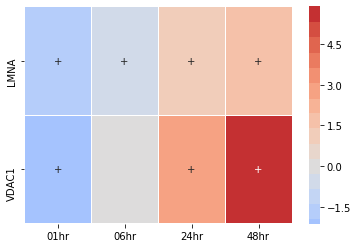

In [26]:
exp_data.label_free.heatmap(
    ['LMNA', 'VDAC1'], 
    figsize=(6,4), 
    linewidths=0.01
);

Notice that the above plot doesn't show any of the modifiers of LMBA (no _s(ph)22_lf). This is because the default index to pivot plots is the `identifier` column. You can set the `label` column for plotting by passing index=`label` to the function. Note, if you want to filter the data using the more generic 'identifier' column, you just specify that with subset_index='identifier'

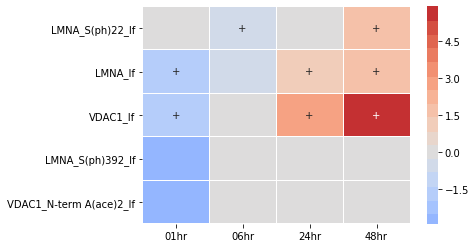

In [27]:
exp_data.label_free.heatmap(
    ['LMNA', 'VDAC1'], 
    subset_index='identifier', 
    index='label',
    figsize=(6,4), 
    linewidths=0.01
);

### Examples

Here are a few examples how all the above commands can be chained together to create plots with varying degrees of critera. 


#### Query 1: 
    Heatmap of label-free proteomics that are signficantly change in at least 3 time points.

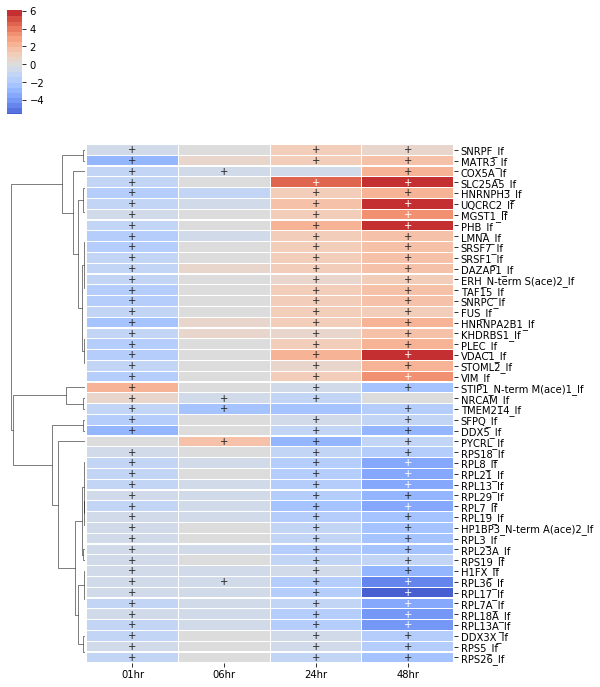

In [28]:
lf_sig = exp_data.label_free.require_n_sig(
    index='label', 
    columns='sample_id', 
    n_sig=3
)
lf_sig.heatmap(
    convert_to_log=True, 
    cluster_row=True, 
    index='label',
    values='fold_change', 
    columns='sample_id', 
    annotate_sig=True, 
    figsize=(8, 12), 
    div_colors=True,
    num_colors=21, 
    linewidths=0.01
);

#### Query 2: 
    Changes that happen at all 3 timepoints for RNA-seq.

In [29]:
exp_data.rna.require_n_sig(n_sig=3, index='label').plot_species(plot_type='plotly');

#### Query 3: 
* Heatmap and time series plot of proteins that are consistently down regulated at 3 time points. 

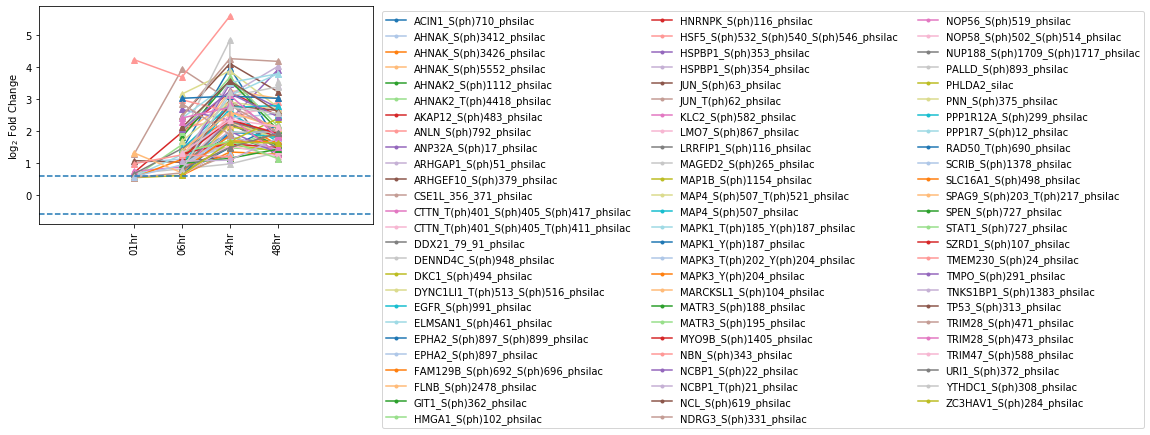

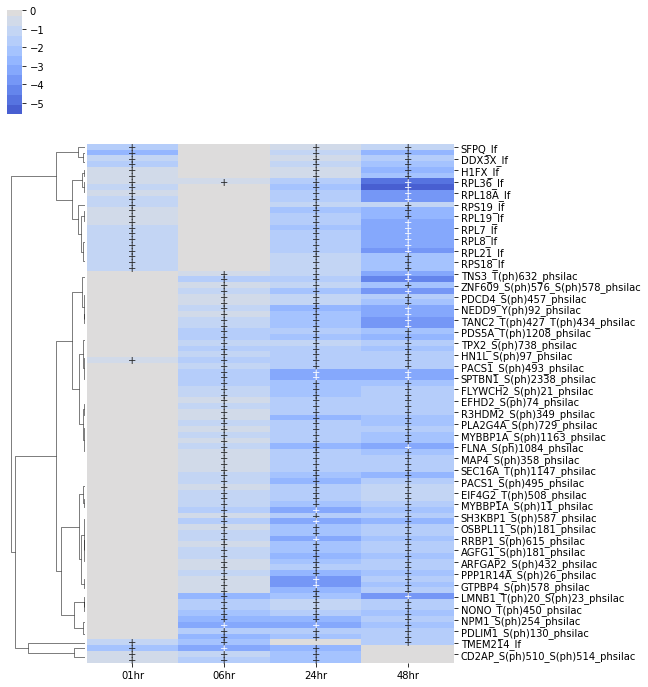

In [30]:
exp_data.proteins.up.require_n_sig(n_sig=3, index='label').plot_species(plot_type='matplotlib');
exp_data.proteins.down.require_n_sig(n_sig=3, index='label').heatmap(index='label', cluster_row=True);

#### Query 4: 
    Clustered heatmap of label-free data

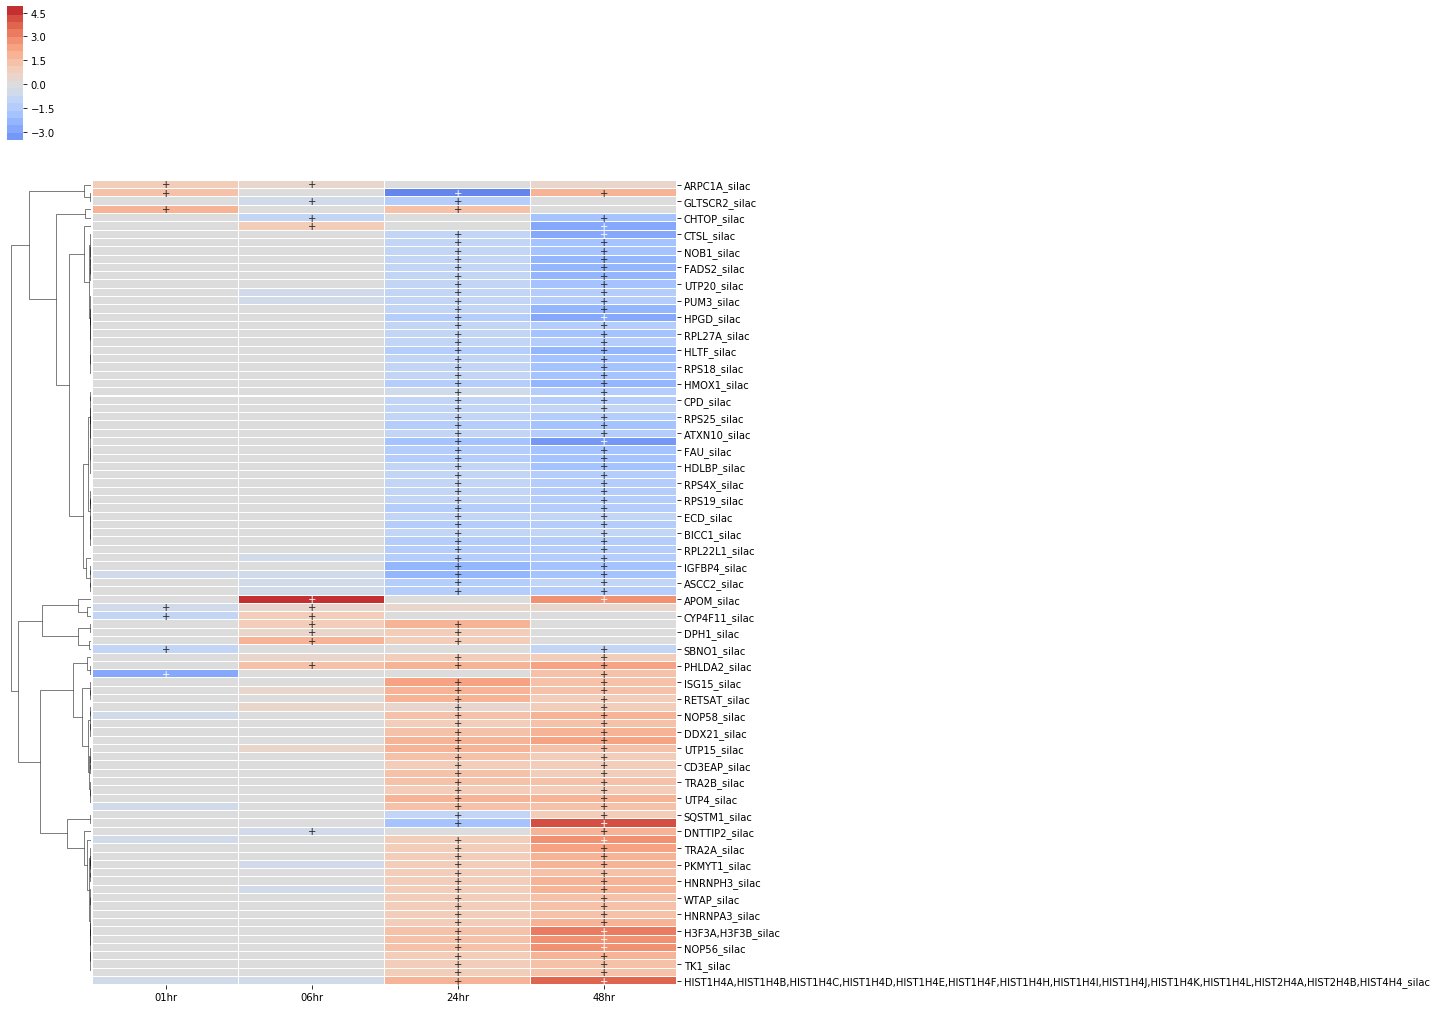

In [31]:
exp_data.silac.heatmap(linewidths=0.01, index='label',
                       cluster_row=True, min_sig=2, figsize=(12,18));

### Extending to other plots

Since our exp_data is built off a pandas.DataFrame, we can use other packages that take that data format. Seaborn is one such tool that provides some very nice plots.

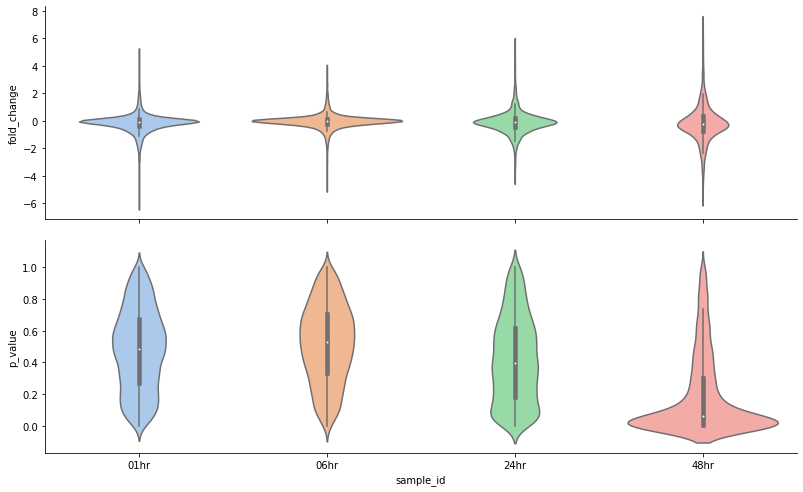

In [32]:
label_free = exp_data.label_free.copy()
label_free.log2_normalize_df(column='fold_change', inplace=True)

g = sns.PairGrid(label_free,
                 x_vars=('sample_id'),
                 y_vars=('fold_change', 'p_value'),
                 hue='source',
                 aspect=3.25, height=3.5)
g.map(
    sns.violinplot, 
    palette="pastel", 
    split=True,
    order=label_free.sample_ids
);

#### Venn diagram comparisons between measurements

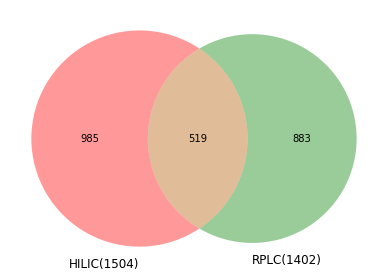

In [33]:
from magine.plotting.venn_diagram_maker import create_venn2, create_venn3

lf = exp_data.label_free.sig.id_list
silac = exp_data.silac.sig.id_list
phsilac = exp_data.ph_silac.sig.id_list
hilic = exp_data.HILIC.sig.id_list
rplc = exp_data.C18.sig.id_list

create_venn2(hilic, rplc, 'HILIC', 'RPLC');

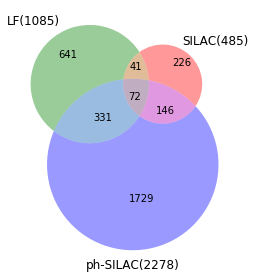

In [34]:
create_venn3(lf, silac, phsilac, 'LF', 'SILAC', 'ph-SILAC');

## Networks

### Create data driven network

In [35]:
from magine.networks.network_generator import build_network
import magine.networks.utils as utils
import networkx as nx
import os

2019-09-16 20:32:12.922 - magine - INFO - Logging started on MAGINE
2019-09-16 20:32:12.924 - magine - INFO - Log entry time offset from UTC: -7.00 hours


In [36]:
if not os.path.exists('Data/cisplatin_network.p'):
    network = build_network(
        seed_species=exp_data.species.sig.id_list,  # genes seed species
        all_measured_list=exp_data.species.id_list,  # all data measured
        use_biogrid=True,  # expand with biogrid
        use_hmdb=True,  # expand with hmdb
        use_reactome=True,  # expand with reactome
        use_signor=True,  # expand with signor
        trim_source_sink=True,  # remove all source and sink nodes not measured
        save_name='Data/cisplatin_network'
    )
else:
    # Load the network, note that it is returned above but for future use
    # we will use load in
    network = nx.read_gpickle('Data/cisplatin_network.p')

utils.add_data_to_graph(network, exp_data)
print("Saving network")
# write to GML for cytoscape or other program
nx.write_gml(
    network,
    os.path.join('Data', 'cisplatin_network_w_attributes.gml')
)

# write to gpickle for fast loading in python
nx.write_gpickle(
    network,
    os.path.join('Data', 'cisplatin_based_network.p'),
)

Saving network


### Explore subgraphs of network

In [37]:
from magine.networks.subgraphs import Subgraph
from magine.networks.visualization import draw_igraph, draw_graphviz, draw_mpl, draw_cyjs
net_sub = Subgraph(network)

In [38]:
print(len(network.nodes()))
print(len(network.edges()))

13308
181300


In [39]:
bax_n = net_sub.neighbors('BAX', upstream=True, downstream=True)

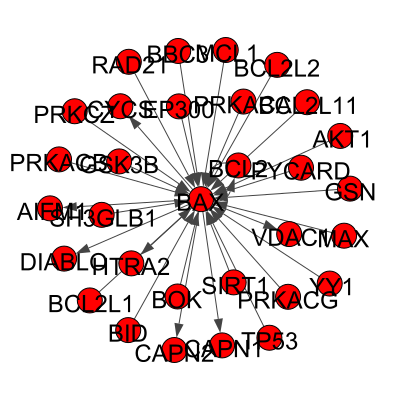

In [40]:
# display_graph(bax_n)
draw_igraph(bax_n, bbox=[400, 400], node_size=25, inline=True)

In [41]:
draw_mpl(bax_n, layout='fdp', scale=3, node_size=100, font_size=12);

In [42]:
draw_graphviz(bax_n, 'fdp')

In [43]:
expand = net_sub.expand_neighbors(bax_n, nodes='CASP3', downstream=True)

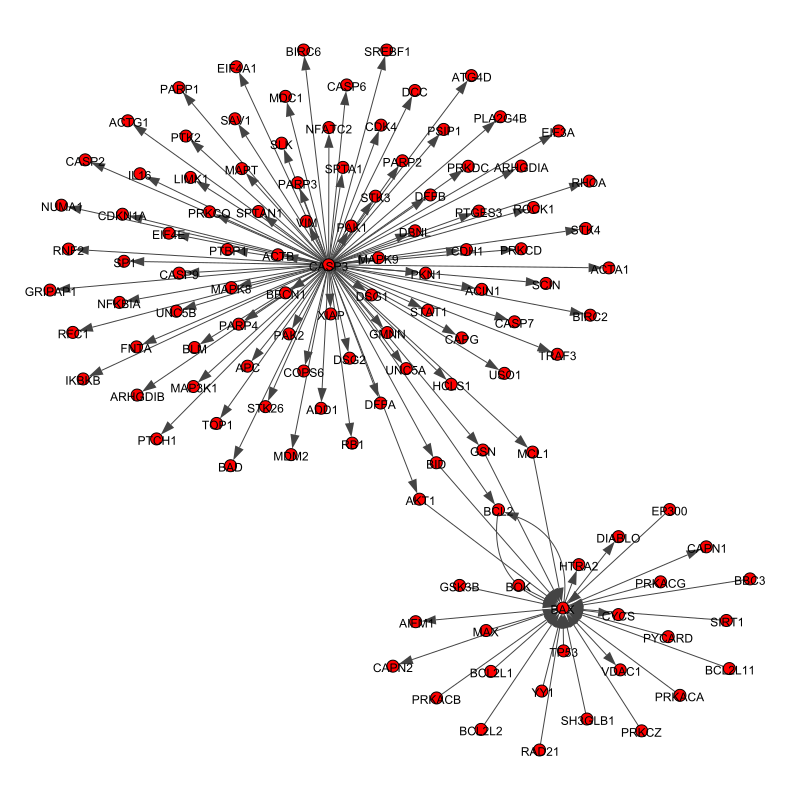

In [44]:
draw_igraph(expand, 
            bbox=[800, 800], 
            node_font_size=12,
            font_size=8,
            node_size=12, 
            inline=True, 
            layout='graphopt')

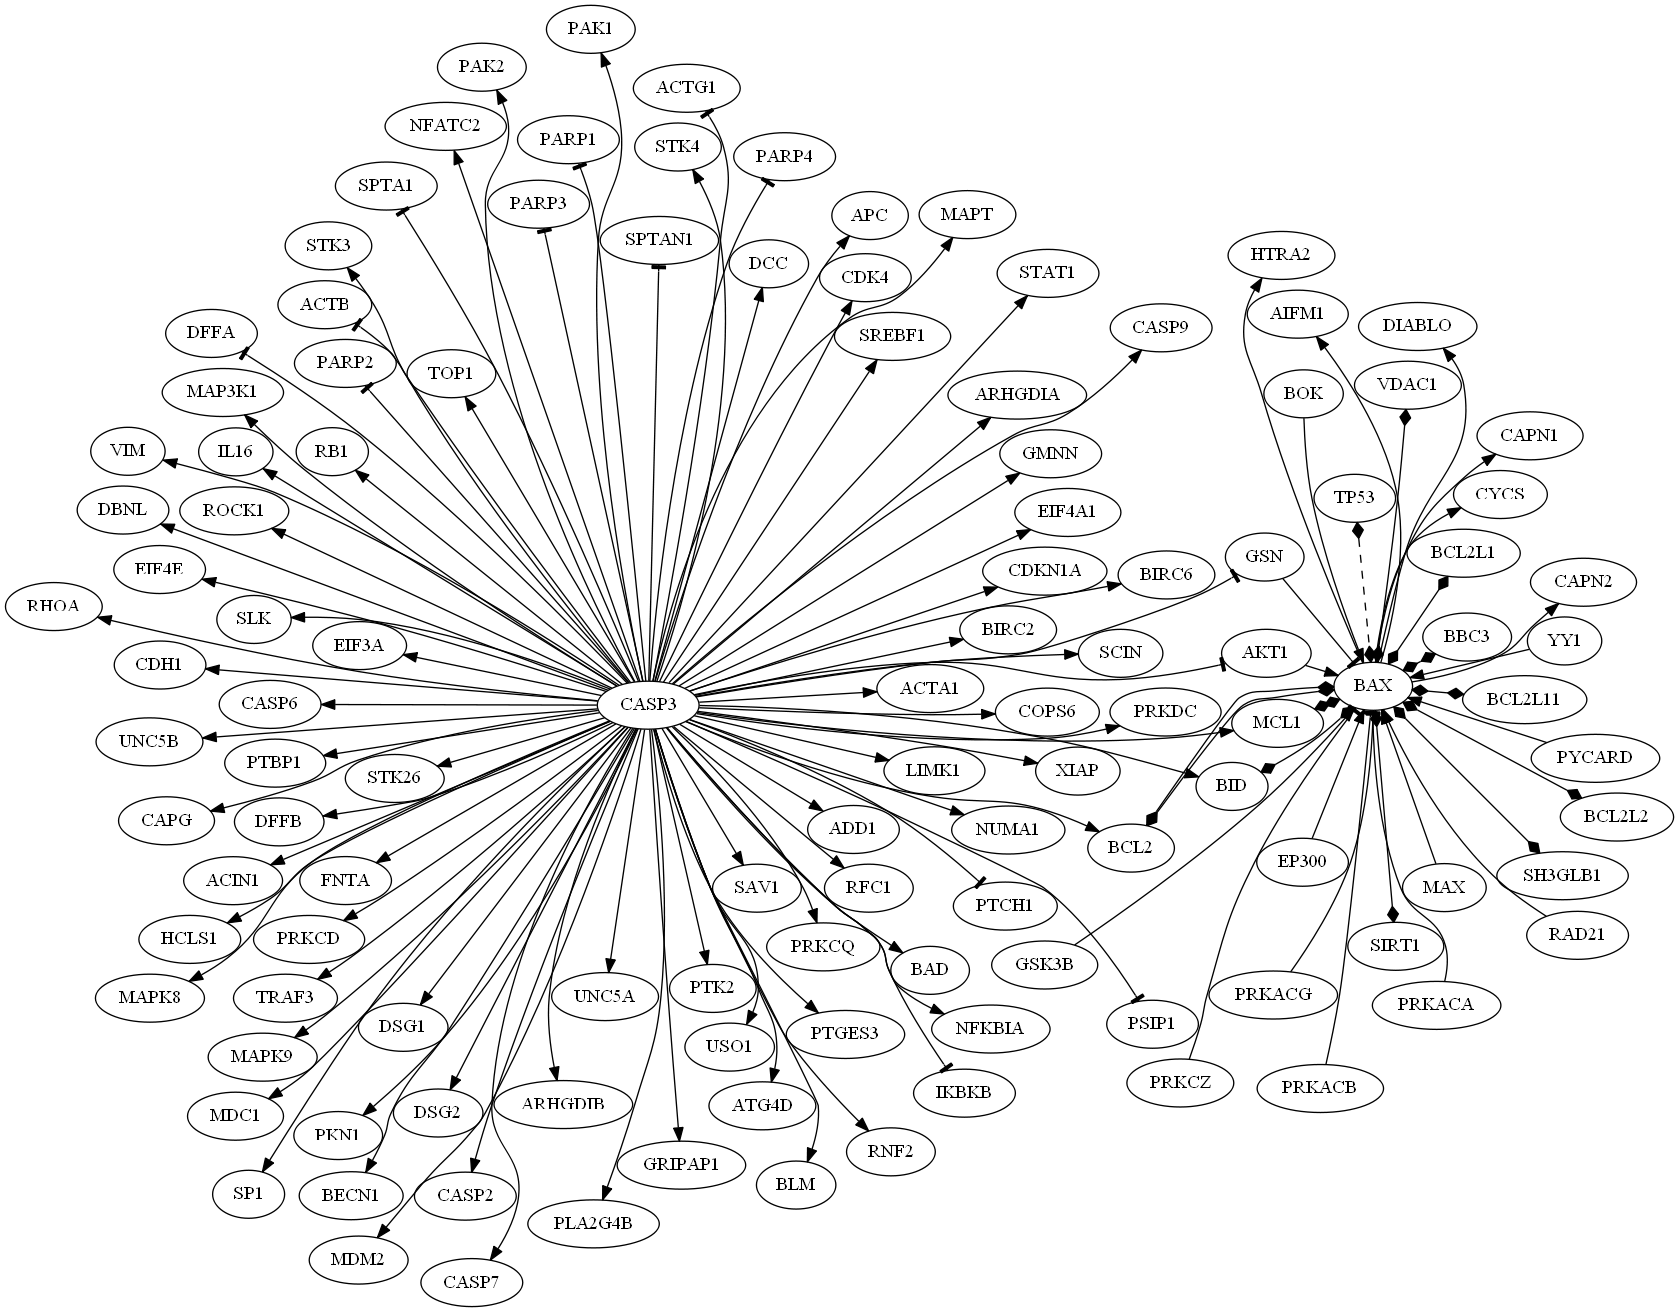

In [45]:
draw_graphviz(expand, 'sfdp', width=500)

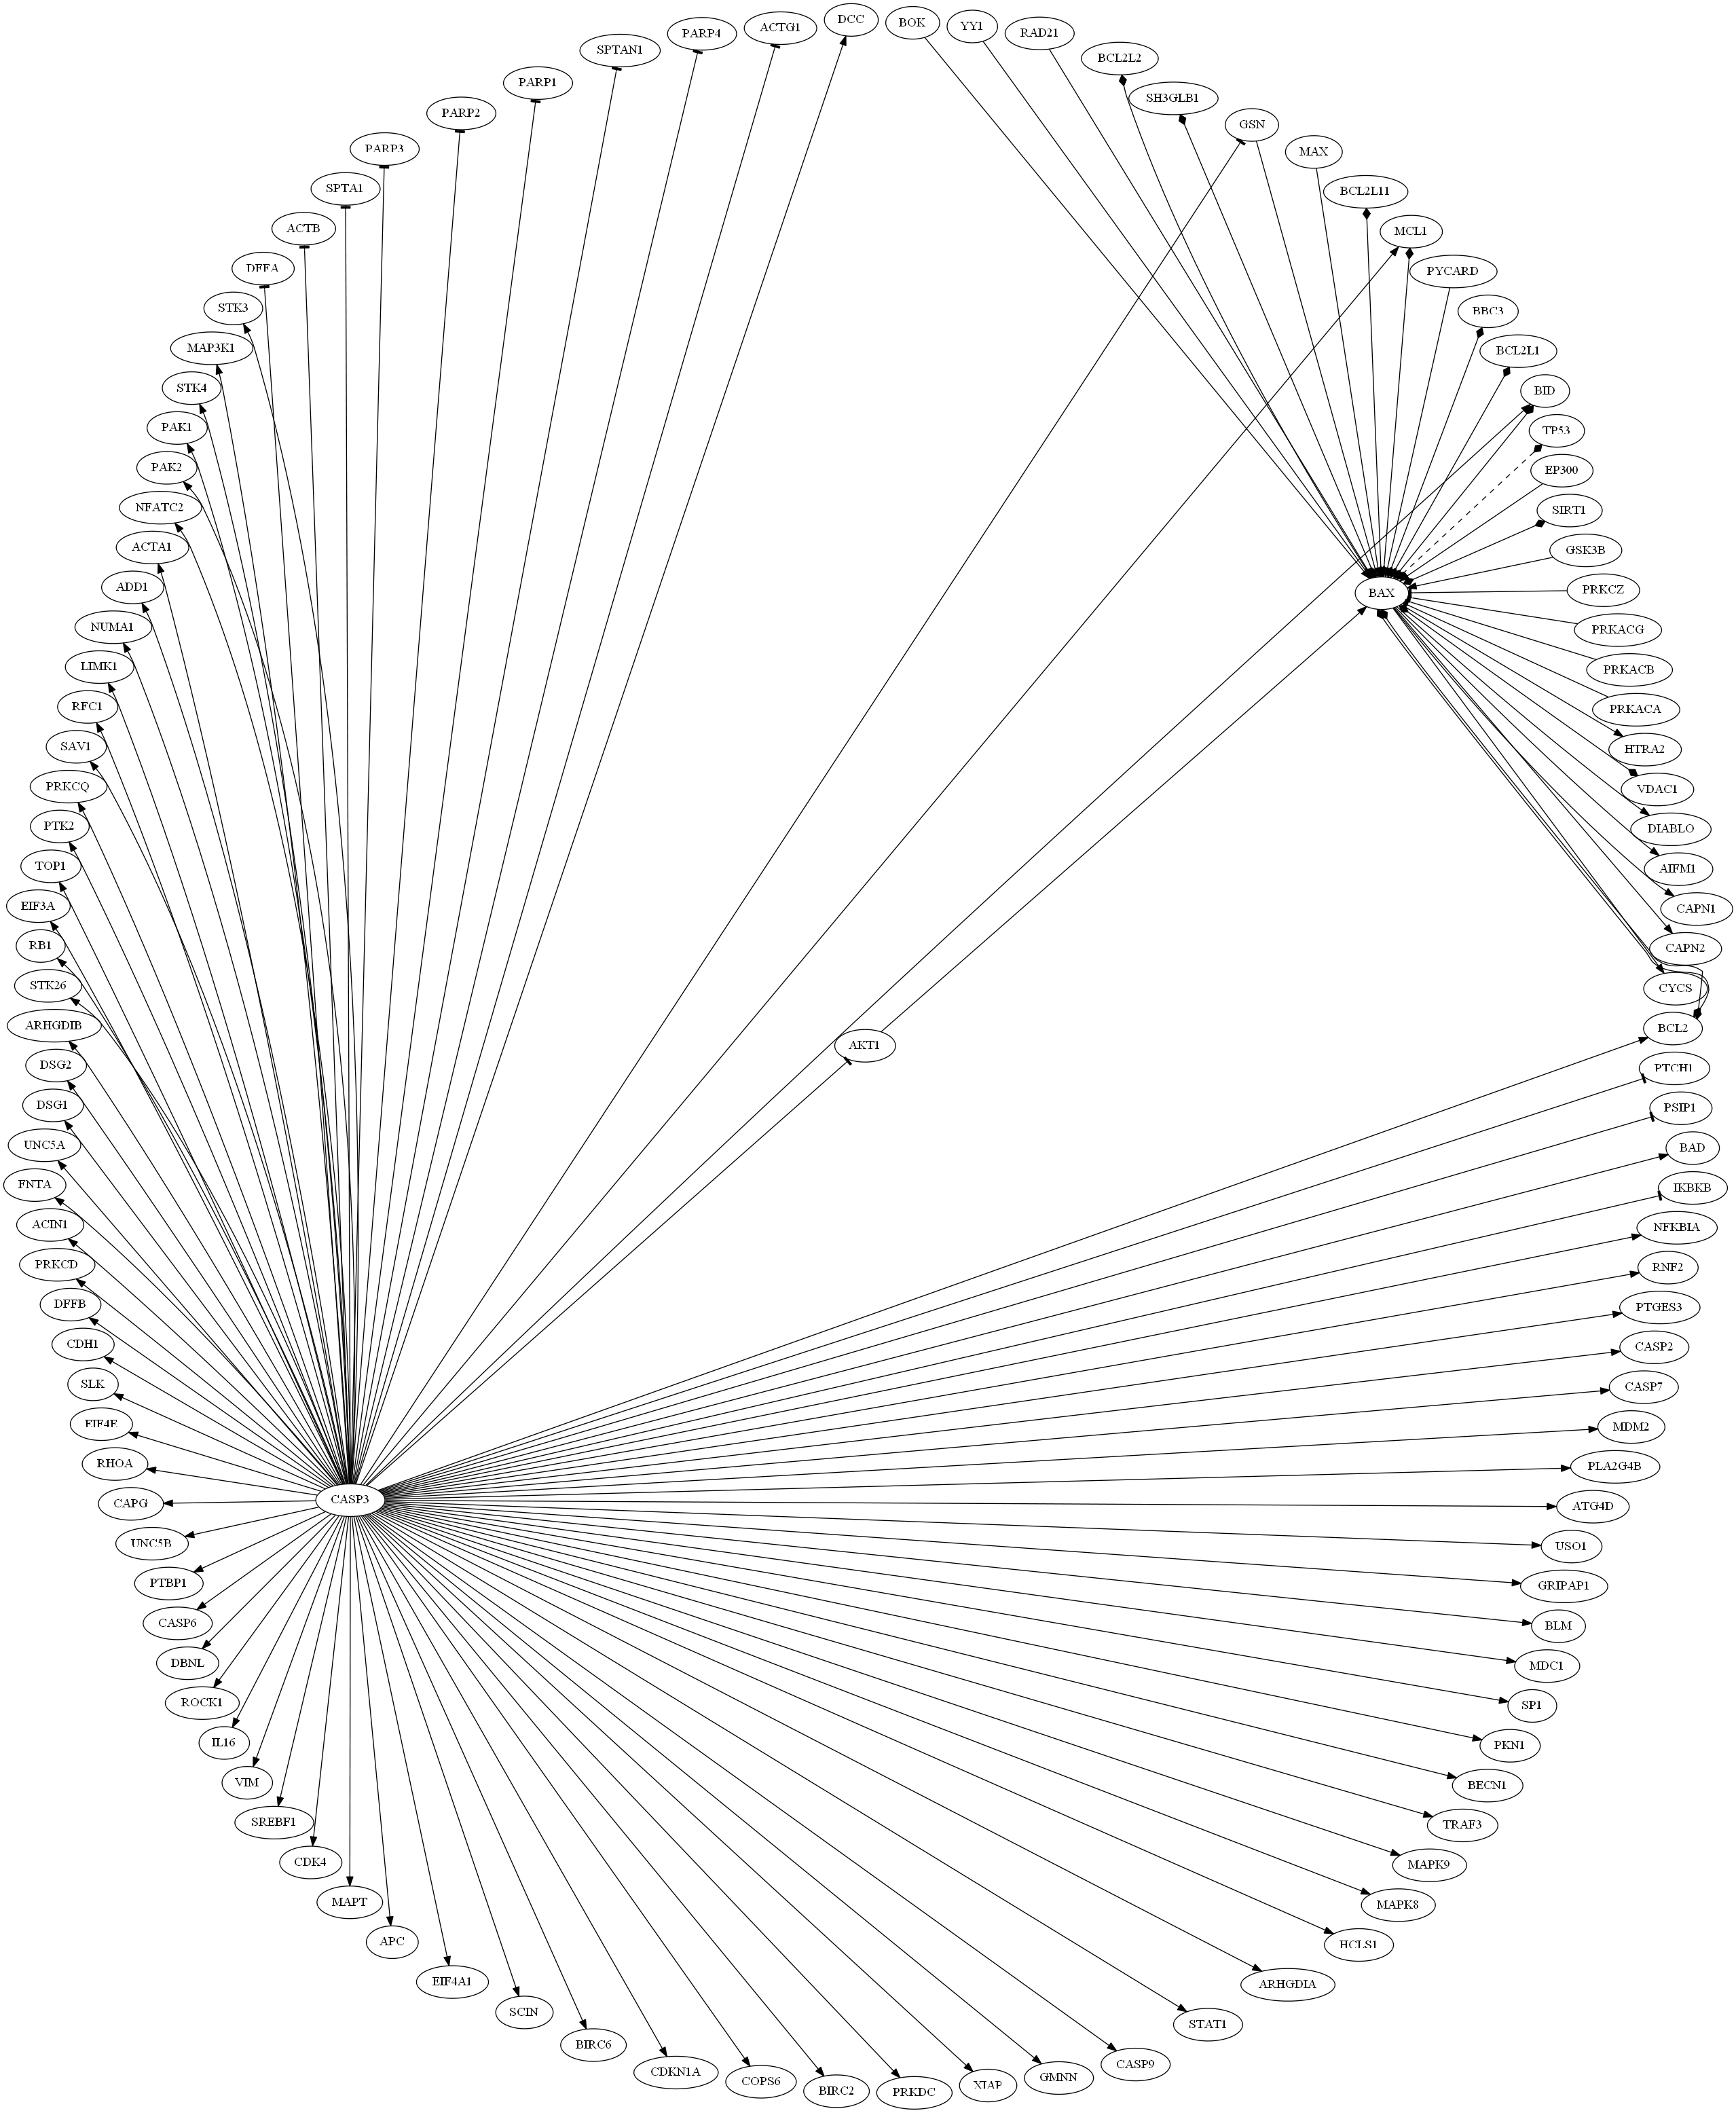

In [46]:
draw_graphviz(expand, 'twopi', width=500)

## Enrichment analysis

In [47]:
from magine.enrichment.enrichr import Enrichr

In [48]:
e = Enrichr()

In [49]:
label_free_enrichment = e.run_samples(exp_data.label_free.sig.up_by_sample, 
                                      exp_data.label_free.sig.sample_ids,
                                      gene_set_lib='Reactome_2016')

In [50]:
label_free_enrichment.head(10)

term_name  rank   p_value    z_score  combined_score  adj_p_value                   genes  n_genes             db  significant sample_id
18     metabolism of fat-soluble vitamins_hsa-6806667    19  0.037587  26.143791       85.780009          1.0                  VKORC1        1  Reactome_2016        False      01hr
19                             metabolism_hsa-1430728    20  0.047930   2.795248        8.491991          1.0  ACSL3,HEXA,RRM1,VKORC1        4  Reactome_2016        False      01hr
25                      l1cam interactions_hsa-373760    26  0.069654  13.888889       37.003049          1.0                   NRCAM        1  Reactome_2016        False      01hr
28                cell-cell communication_hsa-1500931    29  0.093902  10.178117       24.076406          1.0                   LIMS1        1  Reactome_2016        False      01hr
29    metabolism of vitamins and cofactors_hsa-196854    30  0.105465   9.009009       20.264628          1.0                  VKORC1        1  Reactome_2016        False      01hr
42            mrna splicing - major pathway_hsa-72163     2  0.005673  17.559263       90.816629          1.0           EIF4A3,HNRNPC        2  Reactome_2016        False      06hr
43                            mrna splicing_hsa-72172     3  0.006522  16.339869       82.230741          1.0           EIF4A3,HNRNPC        2  Reactome_2016        False      06hr
46  processing of capped intron-containing pre-mrn...     6  0.011454  12.191405       54.488181          1.0           EIF4A3,HNRNPC        2  Reactome_2016        False      06hr
59                   mrna 3'-end processing_hsa-72187    19  0.042493  23.068051       72.858353          1.0                  EIF4A3        1  Reactome_2016        False      06hr
60  post-elongation processing of intron-containin...    20  0.042493  23.068051       72.858353          1.0                  EIF4A3        1  Reactome_2016        False      06hr

In [51]:
label_free_enrichment.term_name = label_free_enrichment.term_name.str.split('_').str.get(0)

In [ ]:
label_free_enrichment.head(10)

In [56]:
label_free_enrichment.heatmap(min_sig=1, 
                              figsize=(4,16),
                              linewidths=0.01,
                              cluster_by_set=False);

In [55]:
print(len(label_free_enrichment.sig.term_name.unique()))

72


There are 72 enriched terms. If we look at the top ranked terms, we see that some fo them have similar descriptions "mrna splicing...". If we look at the gene list, we can also see that some of the genes are similar. To see if there are redundant terms that are enriched, we can calculate their similarity with the Jaccard Index (intersection over union).
![width=50](https://wikimedia.org/api/rest_v1/media/math/render/svg/eaef5aa86949f49e7dc6b9c8c3dd8b233332c9e7)
<img src="https://upload.wikimedia.org/wikipedia/commons/c/c7/Intersection_over_Union_-_visual_equation.png" alt="Drawing" style="width: 300px;"/>

In [64]:
# calculate the Jaccard Index and returns a ranked dataframe of terms and scores.
# Higher scores means more similar terms
d = label_free_enrichment.find_similar_terms('translation')
display(d.head(20))

term_name  similarity_score
137  srp-dependent cotranslational protein targetin...          1.000000
95   srp-dependent cotranslational protein targetin...          1.000000
128                                    gene expression          0.183673
62                              metabolism of proteins          0.176471
148                                    gene expression          0.150000
98                      ire1alpha activates chaperones          0.142857
94                   xbp1(s) activates chaperone genes          0.142857
108                             metabolism of proteins          0.130435
34                   asparagine n-linked glycosylation          0.096774
84             post-translational protein modification          0.088235
109              antigen processing-cross presentation          0.062500
106                                         metabolism          0.014085
102     intra-golgi and retrograde golgi-to-er traffic          0.000000
103  post-elongation processing of intron-containin...          0.000000
0            formation of atp by chemiosmotic coupling          0.000000
104                             mrna 3'-end processing          0.000000
105                                 l1cam interactions          0.000000
100  n-glycan trimming in the er and calnexin/calre...          0.000000
107                    regulation of insulin secretion          0.000000
110               metabolism of vitamins and cofactors          0.000000

We can do this for all terms and view the results in a distance matrix.

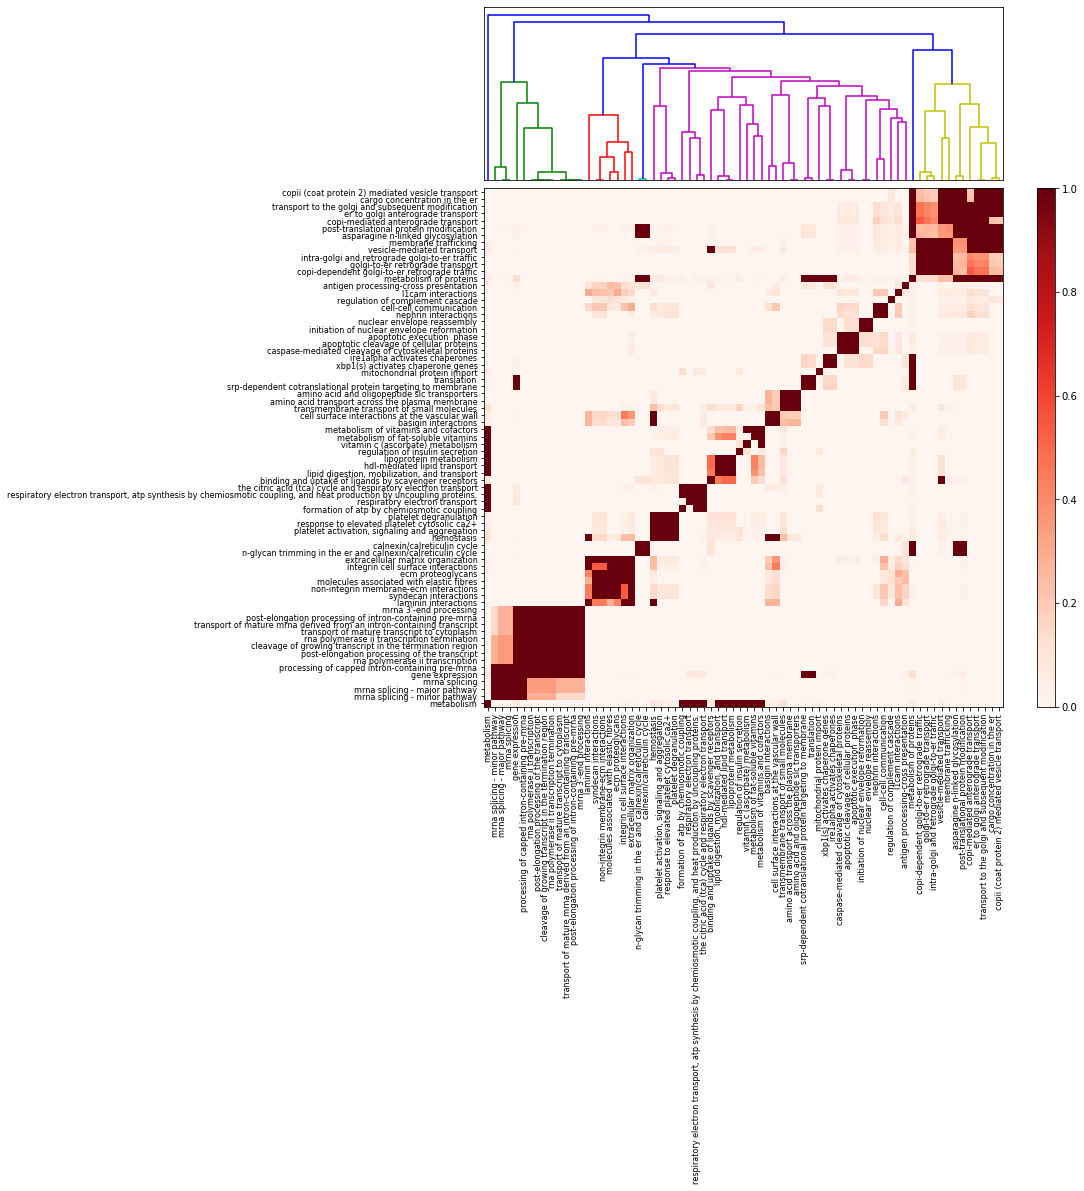

In [65]:
label_free_enrichment.dist_matrix(figsize=(12, 12));

We can remove the redundant ones to compress the array.

In [59]:
label_free_enrichment_slim = label_free_enrichment.remove_redundant(level='dataframe')

Number of rows went from 72 to 27


In [67]:
label_free_enrichment_slim.dist_matrix();

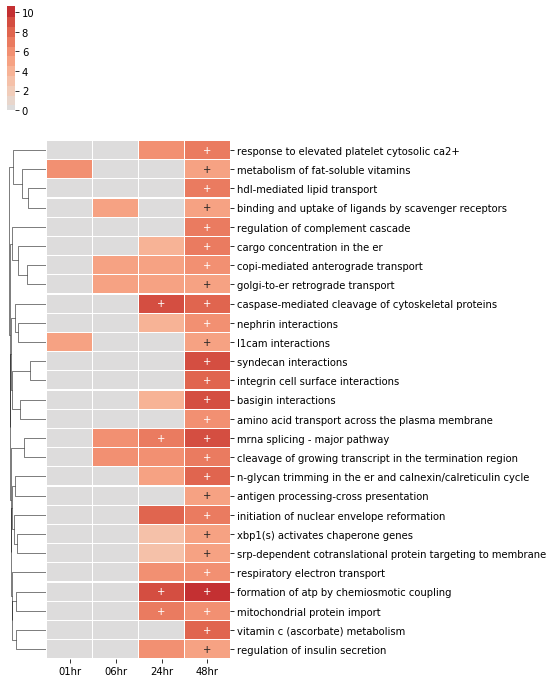

In [60]:
label_free_enrichment_slim.heatmap(min_sig=1, 
                                   figsize=(4,12),
                                   linewidths=0.01,
                                   cluster_by_set=True
                                  );

In [55]:
display(sorted(label_free_enrichment_slim.term_name.unique()))

['amino acid transport across the plasma membrane',
 'antigen processing-cross presentation',
 'basigin interactions',
 'binding and uptake of ligands by scavenger receptors',
 'cargo concentration in the er',
 'caspase-mediated cleavage of cytoskeletal proteins',
 'cleavage of growing transcript in the termination region',
 'copi-mediated anterograde transport',
 'formation of atp by chemiosmotic coupling',
 'golgi-to-er retrograde transport',
 'hdl-mediated lipid transport',
 'initiation of nuclear envelope reformation',
 'integrin cell surface interactions',
 'l1cam interactions',
 'metabolism of fat-soluble vitamins',
 'mitochondrial protein import',
 'mrna splicing - major pathway',
 'n-glycan trimming in the er and calnexin/calreticulin cycle',
 'nephrin interactions',
 'regulation of complement cascade',
 'regulation of insulin secretion',
 'respiratory electron transport',
 'response to elevated platelet cytosolic ca2+',
 'srp-dependent cotranslational protein targeting to memb

For a select term, we can extract out the species of interest to visualize. 

In [56]:
exp_data.label_free.heatmap(
    label_free_enrichment.sig.term_to_genes('caspase-mediated cleavage of cytoskeletal proteins'),
    subset_index='identifier',
    index='label',
    cluster_row=True,
    rank_index=True,
    min_sig=2,
    linewidths=0.01,
    figsize=(2, 4),
);

In [57]:
exp_data.label_free.heatmap(
    label_free_enrichment.sig.term_to_genes('tp53 regulates metabolic genes'),
    subset_index='identifier',
    index='label',
    cluster_row=True,
    rank_index=True,
    min_sig=2,
    linewidths=0.01,
    figsize=(2,6),
);

No terms match subset


In [72]:
ph_silac_enrichment = e.run_samples(exp_data.ph_silac.sig.up_by_sample, 
                                    exp_data.ph_silac.sig.sample_ids,
                                    gene_set_lib='Reactome_2016')

In [73]:
ph_silac_enrichment.term_name = ph_silac_enrichment.term_name.str.split('_').str.get(0)

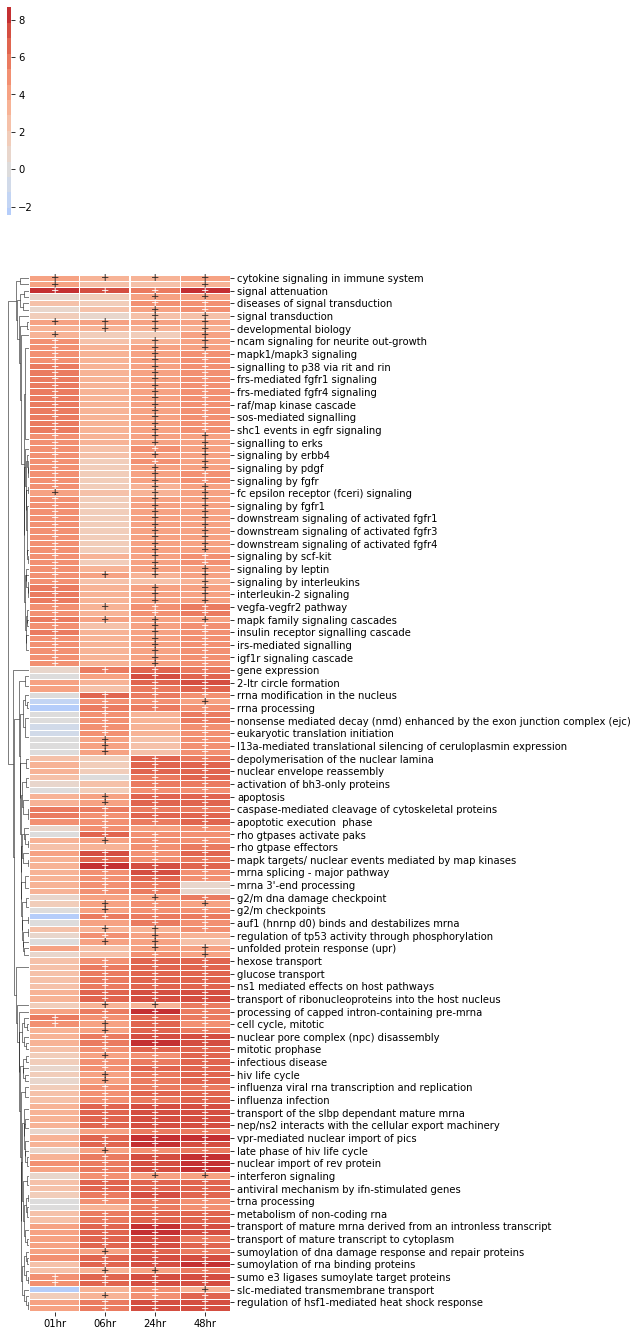

In [74]:
ph_silac_enrichment.heatmap(min_sig=2, 
                            figsize=(4,24),
                            linewidths=0.01,
                            cluster_by_set=True);

In [ ]:
ph_silac_enrichment_slim = ph_silac_enrichment.remove_redundant(level='dataframe')
ph_silac_enrichment_slim.require_n_sig(n_sig=2, inplace=True)
ph_silac_enrichment_slim.heatmap(
    figsize=(4,16),
    linewidths=0.01,
    cluster_by_set=True
);

In [87]:
ph_silac_enrichment_slim.term_name.unique()

array(['activation of the ap-1 family of transcription factors',
       'vpr-mediated nuclear import of pics',
       'nuclear import of rev protein', 'signal attenuation',
       'nuclear envelope breakdown',
       'transport of mature mrna derived from an intronless transcript',
       'sumoylation of rna binding proteins',
       'regulation of hsf1-mediated heat shock response',
       'trna processing in the nucleus',
       'sumoylation of dna replication proteins',
       'growth hormone receptor signaling',
       'transport of mature mrna derived from an intron-containing transcript',
       'mrna splicing - major pathway', '2-ltr circle formation',
       'apoptotic cleavage of cellular proteins',
       'rrna modification in the nucleus',
       'initiation of nuclear envelope reformation',
       'antiviral mechanism by ifn-stimulated genes',
       'sumoylation of dna damage response and repair proteins',
       'influenza life cycle',
       'activation of bad and transl

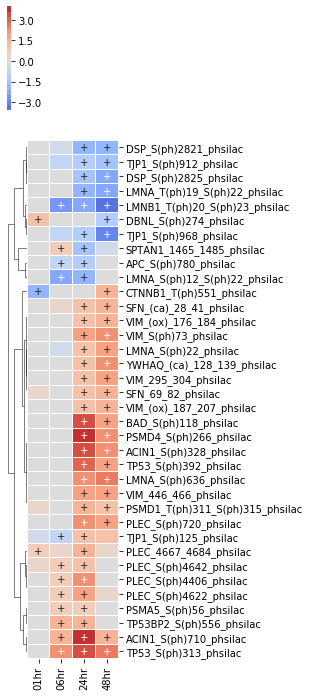

In [83]:
exp_data.ph_silac.heatmap(
    ph_silac_enrichment.sig.term_to_genes('apoptosis'),
    subset_index='identifier',
    index='label',
    cluster_row=True,
    rank_index=True,
    min_sig=2,
    linewidths=0.01,
    figsize=(2,12),
);

In [91]:
from magine.networks.annotated_set import create_subnetwork
# selected terms of interest
terms=['g2/m dna damage checkpoint', 
       'apoptotic cleavage of cellular proteins',
       'regulation of tp53 activity through phosphorylation']

term_net, mol_net = create_subnetwork( 
    ph_silac_enrichment_slim, network,
    terms=terms,
    save_name='all_example',
    use_threshold=True,
    use_cytoscape=False, # If you have cytoscape open, this will create a cytoscape session if True
)

Creating ontology network


In [90]:
draw_cyjs(term_net)

In [93]:
draw_cyjs(mol_net, add_parent=True)